# Receptive Field Analysis
This notebook demonstrates how to run the `brain_observatory.receptive_field_analysis` module.  This module uses a cell's responses to the locally sparse noise stimulus to characterize the spatial receptive field, including on and off subunits.  We highly recommend reading through the the stimulus analysis <a href='http://help.brain-map.org/display/observatory/Documentation]'>whitepaper</a> to understand the locally sparse noise stimulus and the analysis methodology.

Download this file in .ipynb format <a href='receptive_fields.ipynb'>here</a>.

First we import packages.

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.receptive_field_analysis.visualization as rfvis
import allensdk.brain_observatory.receptive_field_analysis.receptive_field as rf
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

Given a cell of interest, we now identify the experiment that contains the locally sparse noise stimulus and download its NWB file.  We also look in the NWB file to figure out the position/index of the cell that has the ID we're interested in.

In [2]:
output_dir = '.'

In [4]:
cell_specimen_id = 587377366

boc =  BrainObservatoryCache(
    manifest_file=str(Path(output_dir) / 'brain_observatory_manifest.json'))

exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id],
                                 stimuli=['locally_sparse_noise'])

data_set = boc.get_ophys_experiment_data(exps[0]['id'])

cell_index = data_set.get_cell_specimen_indices([cell_specimen_id])[0]

print("cell %d has index %d" % (cell_specimen_id, cell_index))

2023-11-14 01:42:16,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514409327


cell 587377366 has index 5


## Compute receptive fields
The following method in the `receptive_field_analysis` module will characterize on and off receptive fields and perform a per-pixel significance test.

In [5]:
rf_data = rf.compute_receptive_field_with_postprocessing(data_set, 
                                                         cell_index, 
                                                         'locally_sparse_noise', 
                                                         alpha=0.5, 
                                                         number_of_shuffles=10000)

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/home/runner/work/AllenSDK/AllenSDK/allensdk/brain_observatory/receptive_field_analysis/chisquarerf.py:408: RuntimeWarning: invalid value encountered in divide
  chi = (residual_by_pixel**2) / expected_by_pixel
/home/runner/work/AllenSDK/AllenSDK/allensdk/brain_observatory/receptive_field_analysis/chisquarerf.py:199: RuntimeWarning: divide by zero encountered in log10
  return np.where(p_values == 0.0, max_NLL, -np.log10(p_values))


## Chi^2 significance map
Per-pixel chi-square tests identify cells that show non-uniform distributions of responses across pixels.  The `receptive_field_analysis.visualization` module has function to plot that significance as a heat map.

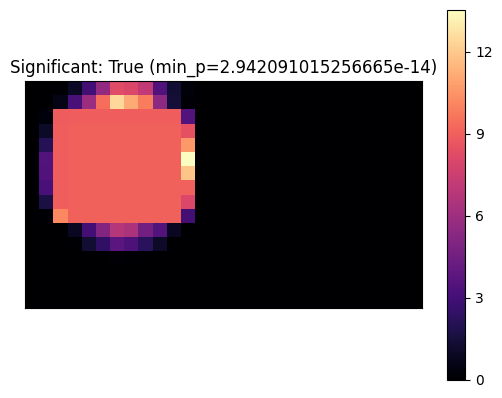

In [6]:
rfvis.plot_chi_square_summary(rf_data)
plt.show()

## Response-triggered stimulus field
The response-triggered stimulus field shows, for a given pixel, how many trials contained a detected calcium event.

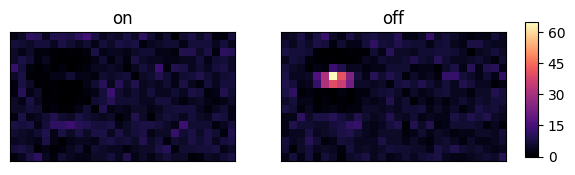

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_summary(rf_data, ax1, ax2)

## Blurred response-triggered stimulus field
The RTS field is convolved with a Gaussian to pool the contributions of neighboring stimulus pixels.  

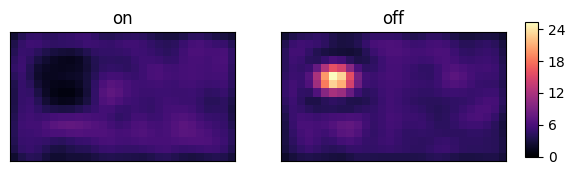

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_blur_summary(rf_data, ax1, ax2)

## p value field

Per-pixel p-values are estimated from the blurred RTS field to understand the significance of the response to each pixel.  

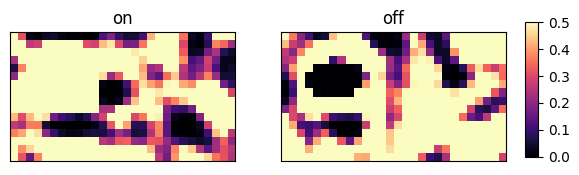

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_p_values(rf_data, ax1, ax2)

## Significance mask

The significance mask is p-value field after applying a binary threshold to remove insignificant pixels.

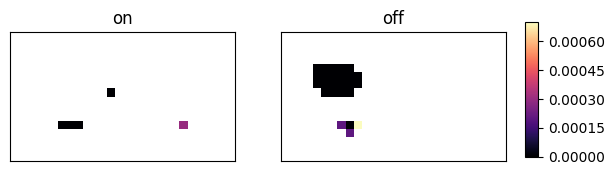

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_mask(rf_data, ax1, ax2)

## Gaussian fit
Each identified subunit of the on and off receptive fields are fit with a Gaussian in the `receptive_field_analysis.postprocessing` module.

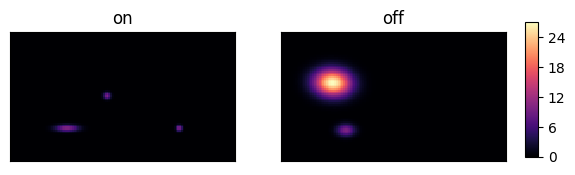

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_gaussian_fit(rf_data, ax1, ax2)

## 4.65 vs 9.3 degree sparse noise stimuli
Newer experiments switched from using a single locally sparse noise stimulus with 4.54 visual-degree pixels to two blocks of stimuli with different pixel sizes (a 4.65 degree block and an 9.3 degree block that are each half the length of the original 4.65-degree-only stimulus).  You can characterize the receptive fields from reponses to each stimulus block separately.

In [12]:
cell_specimen_id = 662279767
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id])
for exp in exps:
    print(boc.get_ophys_experiment_stimuli(exp['id']))

['locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_two', 'spontaneous']
['drifting_gratings', 'natural_movie_one', 'natural_movie_three', 'spontaneous']
['static_gratings', 'natural_scenes', 'natural_movie_one', 'spontaneous']


This cell comes from an experiment that has the new 4.65 degree and 9.3 degree stimulus blocks.  Let's find the experiment that contains the 9.3 degree stimulus.

**Note:** the NWB files refer to these stimuli as `locally_sparse_noise_4deg` and `locally_sparse_noise_8deg` respectively.

In [13]:
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_specimen_id],
                                stimuli=['locally_sparse_noise_4deg'])
data_set = boc.get_ophys_experiment_data(exps[0]['id'])
cell_index = data_set.get_cell_specimen_indices([cell_specimen_id])[0]
print("cell %d has index %d" % (cell_specimen_id, cell_index))

2023-11-14 01:43:34,720 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/650500441


cell 662279767 has index 130


Now we can run the receptive field analysis as before and see what this looks like.

In [14]:
rf_data = rf.compute_receptive_field_with_postprocessing(data_set, 
                                                         cell_index, 
                                                         'locally_sparse_noise_4deg', 
                                                         alpha=0.5, 
                                                         number_of_shuffles=10000)

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/statsmodels/stats/multitest.py:186: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(-pvals))
/home/runner/work/AllenSDK/AllenSDK/allensdk/brain_observatory/receptive_field_analysis/chisquarerf.py:408: RuntimeWarning: invalid value encountered in divide
  chi = (residual_by_pixel**2) / expected_by_pixel
/home/runner/work/AllenSDK/AllenSDK/allensdk/brain_observatory/receptive_field_analysis/chisquarerf.py:199: RuntimeWarning: divide by zero encountered in log10
  return np.where(p_values == 0.0, max_NLL, -np.log10(p_values))


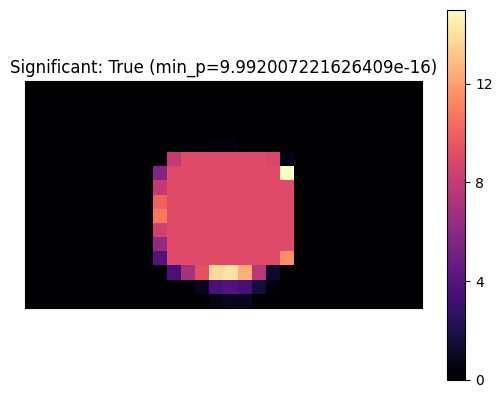

In [15]:
rfvis.plot_chi_square_summary(rf_data)
plt.show()

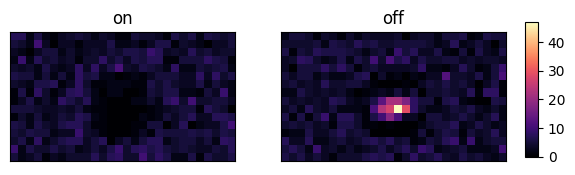

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
rfvis.plot_rts_summary(rf_data, ax1, ax2)